## Final Project Submission

Please fill out:
* Student name: Luis Diego Vallejos
* Student pace: self paced 
* Scheduled project review date/time: 09/10/2020
* Instructor name: Jeff Herman
* Blog post URL: https://diegovallejossalas.github.io/mi_third_data_science_project


For this project we will follow the OSEMN steps.




## Obtain the data

Download libraries

In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from matplotlib import pyplot
import sklearn.preprocessing as preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
from sklearn.metrics import precision_recall_fscore_support as score
from scipy import stats
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import statsmodels.api as sm
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import auc
from sklearn.metrics import roc_curve, precision_recall_curve, confusion_matrix
from sklearn.ensemble import AdaBoostClassifier

In [2]:
df = pd.read_csv('datasets_2667_4430_bigml_59c28831336c6604c800002a.csv')
df.head(5)

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


## Scrub

In [3]:
df.columns

Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
state                     3333 non-null object
account length            3333 non-null int64
area code                 3333 non-null int64
phone number              3333 non-null object
international plan        3333 non-null object
voice mail plan           3333 non-null object
number vmail messages     3333 non-null int64
total day minutes         3333 non-null float64
total day calls           3333 non-null int64
total day charge          3333 non-null float64
total eve minutes         3333 non-null float64
total eve calls           3333 non-null int64
total eve charge          3333 non-null float64
total night minutes       3333 non-null float64
total night calls         3333 non-null int64
total night charge        3333 non-null float64
total intl minutes        3333 non-null float64
total intl calls          3333 non-null int64
total intl charge         3333 non-null float64

In [5]:
df.isnull().sum()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

In [6]:
df.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


As we can see above, it would be better to transform some information in order to make it easier to manipulate.

In [7]:
df['churn'] = df['churn'].replace([True, False], [1, 0])
df['international plan'] = df['international plan'].replace(['yes','no'],[1,0])
df['voice mail plan'] = df['voice mail plan'].replace(['yes','no'],[1,0])

## Explore
Thus far, our dataset looks good. Let's go explore.

In [8]:
df['churn'].value_counts()

0    2850
1     483
Name: churn, dtype: int64

We can see that almost 15% of customers have churned. Is this number high or low compared to competitors?

0    85.508551
1    14.491449
Name: churn, dtype: float64

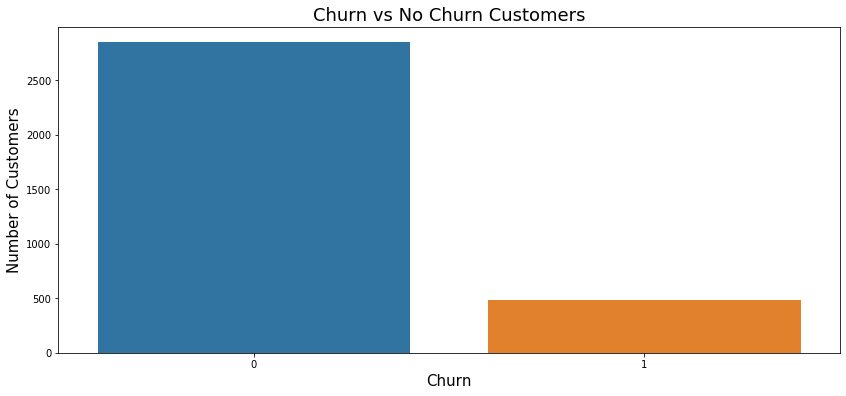

In [9]:
plt.figure(figsize=(14,6))
sns.countplot(df['churn'])
plt.xlabel("Churn", fontsize=15)
plt.ylabel("Number of Customers", fontsize=15)
plt.title('Churn vs No Churn Customers', fontsize=18)
((df['churn']).value_counts() / len(df))*100

As we can see in the graphs below, the columns seem to have a normal distribution. That makes this steps way easier.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000024E5DE85518>,
      dtype=object)

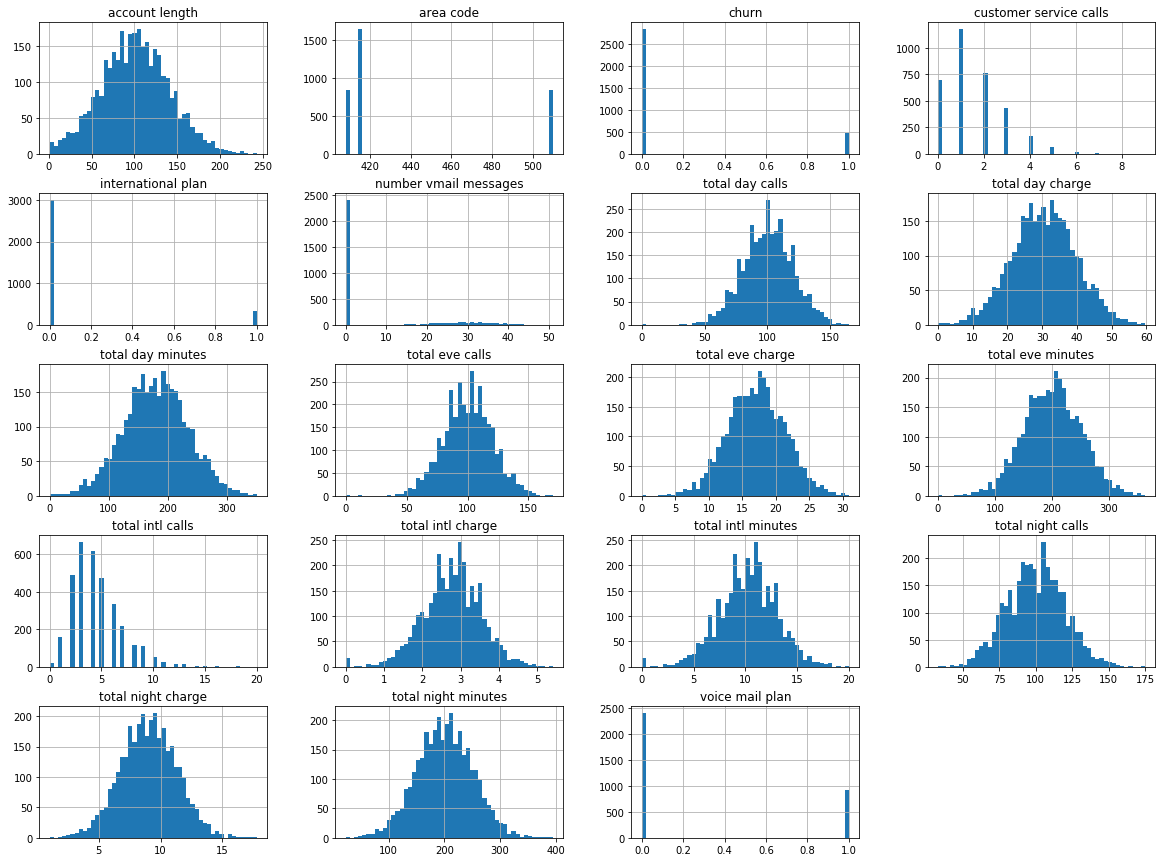

In [10]:
df.hist(bins=50, figsize=(20,15))

### Defining Functions

In [11]:
def dfmaker(col):
    '''
    Function to create a data frame 
    
    Args:
        number of active customers, ex-customers and percentage of churn
    
    Returns:
        Data frame
    '''
    df_churn = df.groupby(col)['churn'].value_counts()
    non_churn = df[df['churn'] == 0][col].value_counts().sort_index()
    non_churn.rename('non_churn', inplace = True)
    churn = df[df['churn'] == 1][col].value_counts().sort_index()
    churn.rename('churn', inplace = True)
    churn_df = pd.concat([non_churn, churn], axis = 1)
    churn_df.fillna(0, inplace = True)
    churn_df.head()
    churn_df['churn %'] = (churn_df['churn'] / (churn_df['churn'] + churn_df['non_churn']) *100)
    return(churn_df)

In [12]:
def vmaker(col):
    '''
    Function to create visualizations
    
    Args:
        Compares percentage of churn per values on variables
    
    Returns:
        Visualization
    '''
    df_churn = df.groupby(col)['churn'].value_counts()
    non_churn = df[df['churn'] == 0][col].value_counts().sort_index()
    non_churn.rename('non_churn', inplace = True)
    churn = df[df['churn'] == 1][col].value_counts().sort_index()
    churn.rename('churn', inplace = True)
    churn_df = pd.concat([non_churn, churn], axis = 1)
    churn_df.fillna(0, inplace = True)
    churn_df.head()
    churn_df['churn %'] = (churn_df['churn'] / (churn_df['churn'] + churn_df['non_churn']) *100)

    totals = [i+j for i,j in zip(churn_df['non_churn'], churn_df['churn'])]
    blueBars = [i / j * 100 for i,j in zip(churn_df['non_churn'], totals)]
    redBars = [i / j * 100 for i,j in zip(churn_df['churn'], totals)]
    plt.figure(figsize=(14,6))
    sns.set(style="whitegrid")
    names = churn_df.index
    plt.bar(range(len(churn_df)), blueBars, color="#34495e", width=0.8, label = 'No Churn')
    plt.bar(range(len(churn_df)), redBars, bottom=blueBars, color="#e74c3c", width=0.8, 
           label = 'Churn')
    plt.title(f'Comparing Churn by {col}', fontsize=18)
    plt.xticks(range(len(churn_df)), names)
    plt.xlabel(col)
    plt.ylabel("Percentage")
    plt.legend(loc='upper left', bbox_to_anchor=(1,1), ncol=1)

In [13]:
def hmaker(col, order = False):
    '''
    Function to create visualizations
    
    Args:
        Creates histograms
    
    Returns:
        Visualization
    '''
    if not order:
        plt.figure(figsize=(14,6))
        sns.countplot(df[col])
        plt.title(f'Number of Customers per Feature: {col}', fontsize=18)
        plt.xticks(fontsize=10)
        plt.ylabel("Number of Employees",fontsize=14)
        plt.xlabel(col,fontsize=14)
        plt.show()
    else:
        plt.figure(figsize=(14,6))
        sns.countplot(df[col], order = order)
        plt.title(f'Number of Customers per Feature:  {col}', fontsize=18)
        plt.xticks(fontsize=10)
        plt.ylabel("Number of Employees",fontsize=14)
        plt.xlabel(col,fontsize=14)
        plt.show()

#### Customer service

In [14]:
dfmaker('customer service calls')

,non_churn,churn,churn %
0,605.0,92,13.199426
1,1059.0,122,10.330229
2,672.0,87,11.462451
3,385.0,44,10.256410
4,90.0,76,45.783133
5,26.0,40,60.606061
6,8.0,14,63.636364
7,4.0,5,55.555556
8,1.0,1,50.000000
9,0.0,2,100.000000


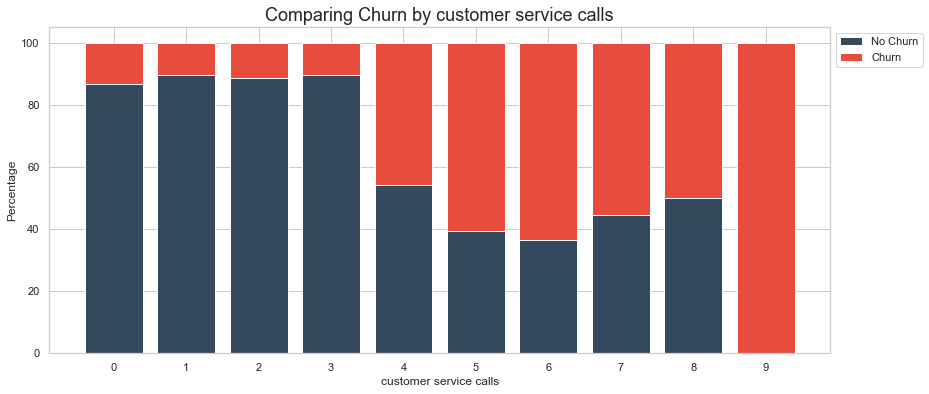

In [15]:
vmaker('customer service calls')

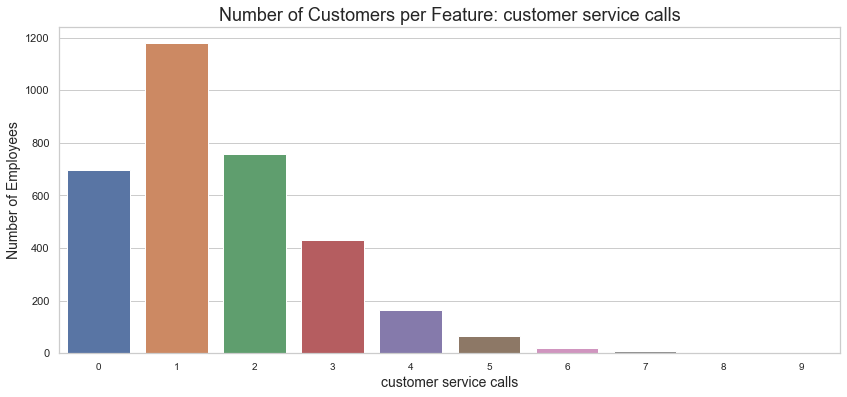

In [16]:
hmaker('customer service calls')

We can see that there is a strong correlation betweeen the number of customer service calls and churn. As soon as the customer calls 3 times, the next time it has a 50% of chances to churn.

6.0
0.0


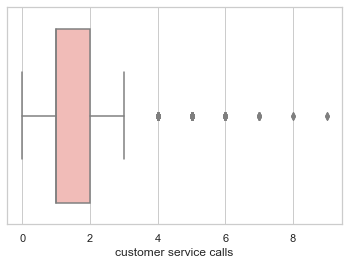

In [17]:
print(df['customer service calls'].quantile(0.99))
print(df['customer service calls'].quantile(0.01))

sns.boxplot(df['customer service calls'], palette="Pastel1")

#### International Plan

In [18]:
dfmaker('international plan')

,non_churn,churn,churn %
0,2664,346,11.495017
1,186,137,42.414861


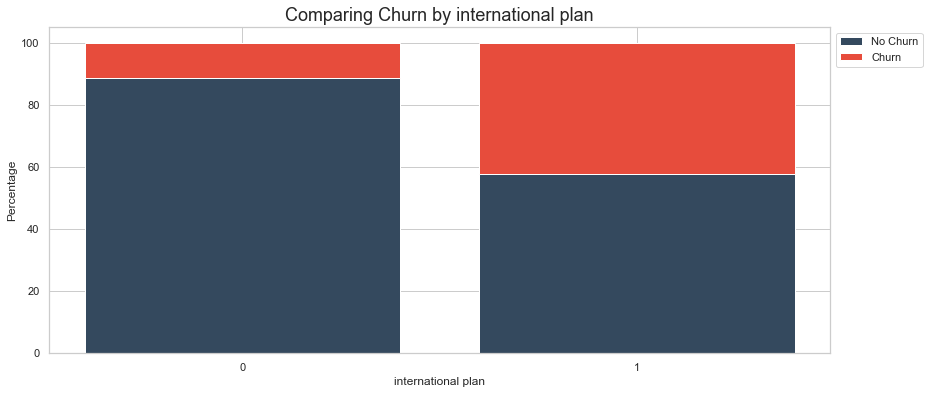

In [19]:
vmaker('international plan')

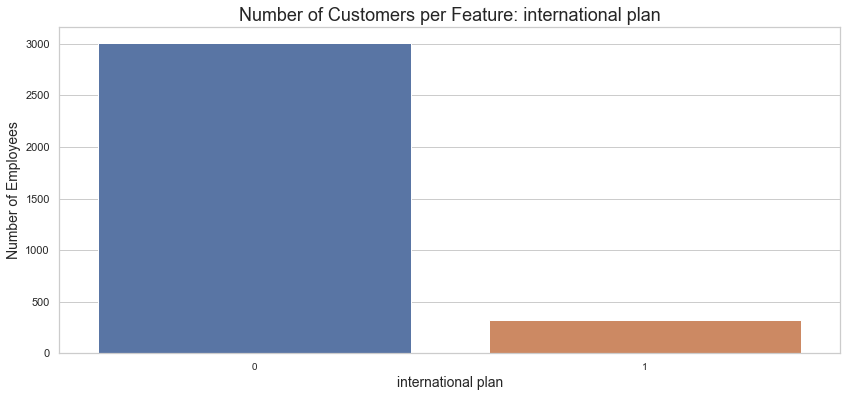

In [20]:
hmaker('international plan')

We can see that 40% of the customers with an international plan have churned.

#### Total day minutes

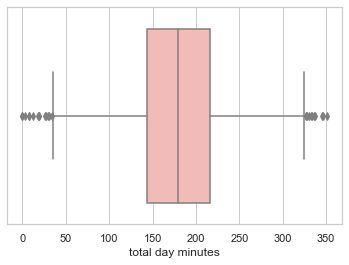

In [21]:
sns.boxplot(df['total day minutes'], palette="Pastel1")

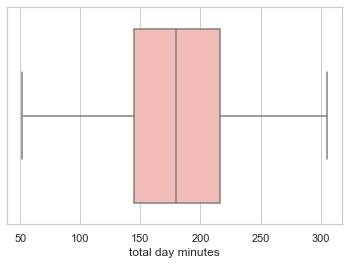

In [22]:
df = df.loc[df['total day minutes'] < df['total day minutes'].quantile(0.99)]
df = df.loc[df['total day minutes'] > df['total day minutes'].quantile(0.01)]
sns.boxplot(df['total day minutes'], palette="Pastel1")

In [23]:
df['state'].nunique()

51

We are going to drop some columns that are not relevant for our work.

In [24]:
df = df.drop('state', axis = 1)
df = df.drop('phone number', axis = 1)
df.head()

,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


#### Voice mail plan

In [25]:
dfmaker('voice mail plan')

,non_churn,churn,churn %
0,1987,374,15.840745
1,826,79,8.729282


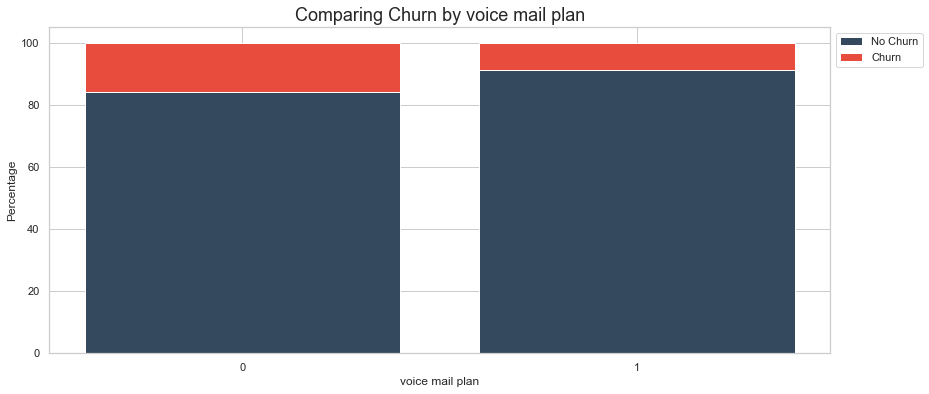

In [26]:
vmaker('voice mail plan')

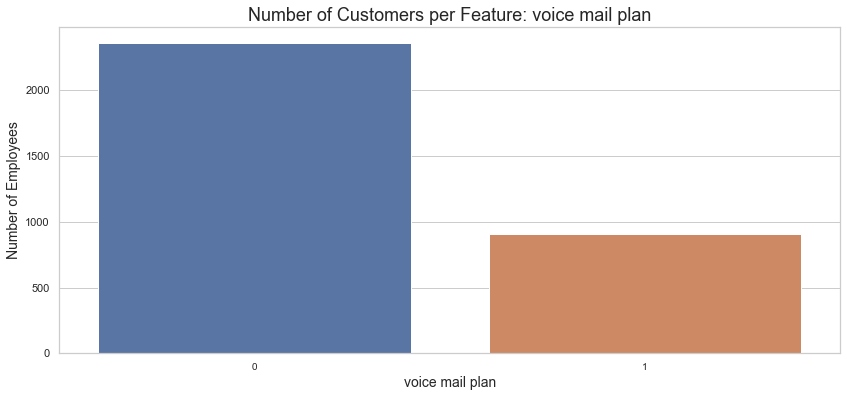

In [27]:
hmaker('voice mail plan')

In [28]:
df['total charge'] = df['total day charge']+df['total eve charge']+df['total night charge']+df['total intl charge']
df['total minutes'] = df['total day minutes']+df['total eve minutes']+df['total night minutes']+df['total intl minutes']
df.head()

,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,...,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn,total charge,total minutes
0,128,415,0,1,25,265.1,110,45.07,197.4,99,...,244.7,91,11.01,10.0,3,2.70,1,0,75.56,717.2
1,107,415,0,1,26,161.6,123,27.47,195.5,103,...,254.4,103,11.45,13.7,3,3.70,1,0,59.24,625.2
2,137,415,0,0,0,243.4,114,41.38,121.2,110,...,162.6,104,7.32,12.2,5,3.29,0,0,62.29,539.4
3,84,408,1,0,0,299.4,71,50.90,61.9,88,...,196.9,89,8.86,6.6,7,1.78,2,0,66.80,564.8
4,75,415,1,0,0,166.7,113,28.34,148.3,122,...,186.9,121,8.41,10.1,3,2.73,3,0,52.09,512.0


#### Total charge

We can sea a relationship between total charge and churn. It seems like people with higher charges are more likely to churn.

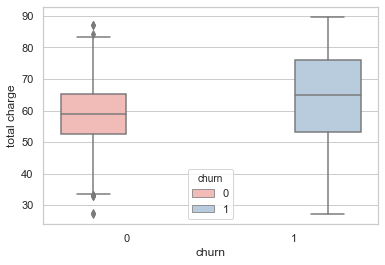

In [29]:
sns.boxplot(x="churn", y="total charge",
            hue="churn", palette="Pastel1",
            data=df)

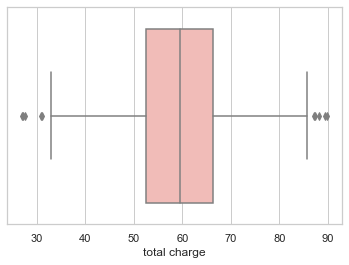

In [30]:
sns.boxplot(df['total charge'], palette="Pastel1")

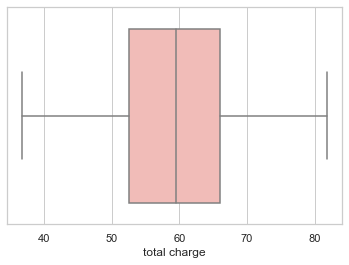

In [31]:
df = df.loc[df['total charge'] < df['total charge'].quantile(0.99)]
df = df.loc[df['total charge'] > df['total charge'].quantile(0.01)]
sns.boxplot(df['total charge'], palette="Pastel1")

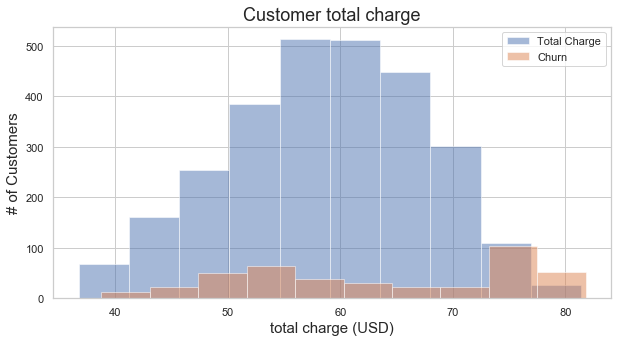

In [32]:
churn_df = df[df['churn'] == 1]
no_churn_df = df[df['churn'] == 0]

plt.figure(figsize=(10,5))
plt.hist(no_churn_df['total charge'], alpha = .5, label = 'Total Charge')
plt.hist(churn_df['total charge'], alpha = .5, label = 'Churn')
plt.title('Customer total charge', fontsize=18)
plt.xlabel('total charge (USD)', fontsize=15)
plt.ylabel('# of Customers', fontsize=15)
plt.legend()
plt.show()

#### Total minutes

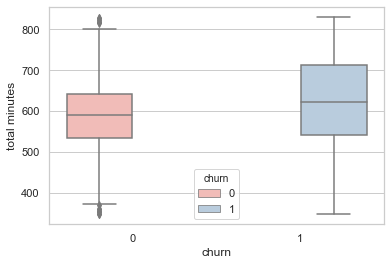

In [33]:
sns.boxplot(x="churn", y="total minutes",
            hue="churn", palette="Pastel1",
            data=df)

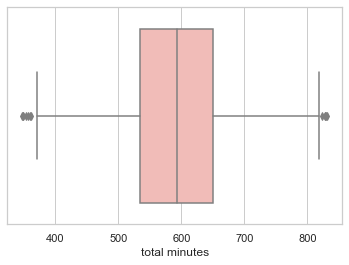

In [34]:
sns.boxplot(df['total minutes'],palette="Pastel1")

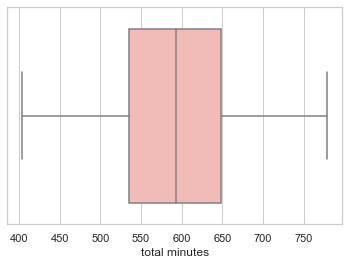

In [35]:
df = df.loc[df['total minutes'] < df['total minutes'].quantile(0.99)]
df = df.loc[df['total minutes'] > df['total minutes'].quantile(0.01)]
sns.boxplot(df['total minutes'],palette="Pastel1")

#### Account lenght

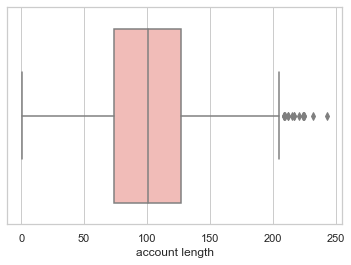

In [36]:
sns.boxplot(df['account length'], palette="Pastel1")

In [37]:
df = df.loc[df['total charge'] < df['account length'].quantile(0.99)]

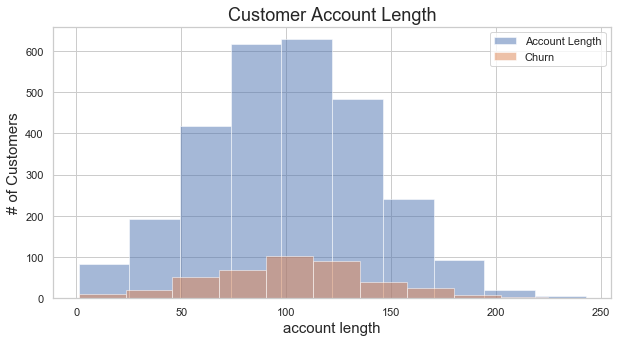

In [38]:
plt.figure(figsize=(10,5))
plt.hist(no_churn_df['account length'], alpha = .5, label = 'Account Length')
plt.hist(churn_df['account length'], alpha = .5, label = 'Churn')
plt.title('Customer Account Length', fontsize=18)
plt.xlabel('account length', fontsize=15)
plt.ylabel('# of Customers', fontsize=15)
plt.legend()
plt.show()

In [39]:
print('We dropped',((3333-3137)/3333)*100,'% of our dataset to remove outliers')

We dropped 5.8805880588058805 % of our dataset to remove outliers


## Model

### Define Variables and Target

We defined our target and variables and we also dropped some columns that are not significant in order to simplify out database.

In [40]:
y = df['churn']
X = df[['international plan', 'total day minutes',
                    'total day charge', 'total eve minutes',
                    'total eve charge', 'total night minutes','voice mail plan', 'number vmail messages',
                    'total intl charge', 'customer service calls', 'total charge',
                    'total minutes']]
y.value_counts()

0    2734
1     402
Name: churn, dtype: int64

## Feature scaling - Data normalization 

This is an important step. We are using MinMaxScaler to transform our variable ranges in a scale from 0 to 1.

In [41]:
scaler=MinMaxScaler()
X = pd.DataFrame(scaler.fit_transform(X),columns=X.columns)

In [42]:
X.head()

,international plan,total day minutes,total day charge,total eve minutes,total eve charge,total night minutes,voice mail plan,number vmail messages,total intl charge,customer service calls,total charge,total minutes
0,0.0,0.842084,0.842081,0.499850,0.500000,0.572161,1.0,0.490196,0.500000,0.111111,0.860616,0.836092
1,0.0,0.433478,0.433349,0.494135,0.494338,0.599772,1.0,0.509804,0.685185,0.111111,0.496655,0.590497
2,0.0,0.756415,0.756386,0.270677,0.270701,0.338457,0.0,0.000000,0.609259,0.000000,0.564674,0.361452
3,1.0,0.977497,0.977473,0.092331,0.092357,0.436095,0.0,0.000000,0.329630,0.222222,0.665254,0.429258
4,1.0,0.453612,0.453553,0.352180,0.352442,0.407629,0.0,0.000000,0.505556,0.333333,0.337199,0.288308


## Preprocessing: split of data into training and test set

In [43]:
X_train , X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(2352, 12)
(2352,)
(784, 12)
(784,)


## Logistic Regression

In [44]:
logit  = LogisticRegression(random_state=2,fit_intercept = True, solver='liblinear')
model_log = logit.fit(X_train, y_train)
log_pred = model_log.predict(X_train)
log_pred_test = model_log.predict(X_test)

In [45]:
model_log.score(X_test,y_test)

0.8788265306122449

In [46]:
logscore = model_log.score(X_test,y_test)

### Let's confirm our algorith accuracy

              precision    recall  f1-score   support

           0       0.89      0.99      0.93       688
           1       0.53      0.10      0.17        96

    accuracy                           0.88       784
   macro avg       0.71      0.55      0.55       784
weighted avg       0.84      0.88      0.84       784



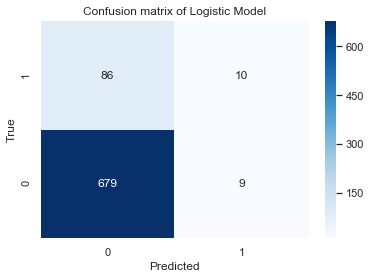

In [47]:
print(classification_report(y_test,log_pred_test))
lr_matrix = confusion_matrix(y_test, log_pred_test)
f,ax=plt.subplots()
sns.heatmap(lr_matrix, annot=True, fmt='d', cmap='Blues',ax=ax)
ax.set_ylim([0,2])
plt.ylabel('True')
plt.xlabel('Predicted')
plt.title("Confusion matrix of Logistic Model")
plt.show()

AUC: 0.8143168604651163


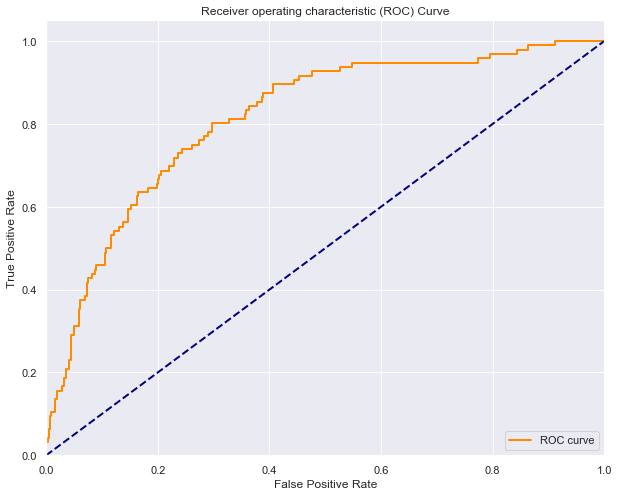

In [48]:
y_score = logit.fit(X_train, y_train).decision_function(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_score)

sns.set_style('darkgrid')

print('AUC: {}'.format(auc(fpr, tpr)))
plt.figure(figsize=(10, 8))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

So far our model has an 85% of accuracy, Looks good.

## Random Forest Classifier

In [49]:
y = df['churn']
X = df[['international plan', 'total day minutes',
                    'total day charge', 'total eve minutes',
                    'total eve charge', 'total night minutes','voice mail plan', 'number vmail messages',
                    'total intl charge', 'customer service calls', 'total charge',
                    'total minutes']]
y.value_counts()

0    2734
1     402
Name: churn, dtype: int64

In [50]:
X_train , X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(2352, 12)
(2352,)
(784, 12)
(784,)


In [51]:
rfc =RandomForestClassifier(n_estimators=100, max_depth=5)
model_rfc = rfc.fit(X_train, y_train)
rfc_pred = model_rfc.predict(X_test)
rfc_pred_train = model_rfc.predict(X_train)

In [52]:
model_rfc.score(X_test, y_test)

0.9553571428571429

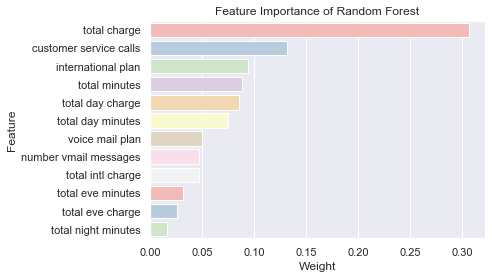

In [53]:
RF_feat_im = pd.DataFrame(rfc.feature_importances_)
RF_feat_im["Feature"] = list(X) 
RF_feat_im.sort_values(by=0, ascending=False).head()
g = sns.barplot(0,"Feature",data = RF_feat_im.sort_values(by=0, ascending=False), palette="Pastel1",orient = "h")
g.set_xlabel("Weight")
g = g.set_title("Feature Importance of Random Forest")

Classification report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.98       688
           1       1.00      0.64      0.78        96

    accuracy                           0.96       784
   macro avg       0.98      0.82      0.88       784
weighted avg       0.96      0.96      0.95       784



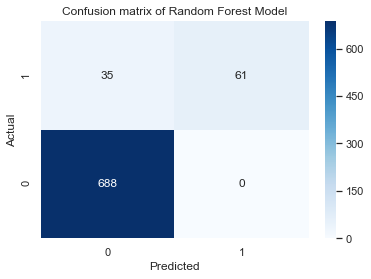

In [54]:
print("Classification report:\n", classification_report(y_test, rfc_pred))
cf_matrix = confusion_matrix(y_test, rfc_pred)
f,ax=plt.subplots()
sns.heatmap(cf_matrix, annot=True, fmt='d', cmap='Blues',ax=ax)
ax.set_ylim([0,2])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title("Confusion matrix of Random Forest Model")
plt.show()

AUC: 0.8177083333333333


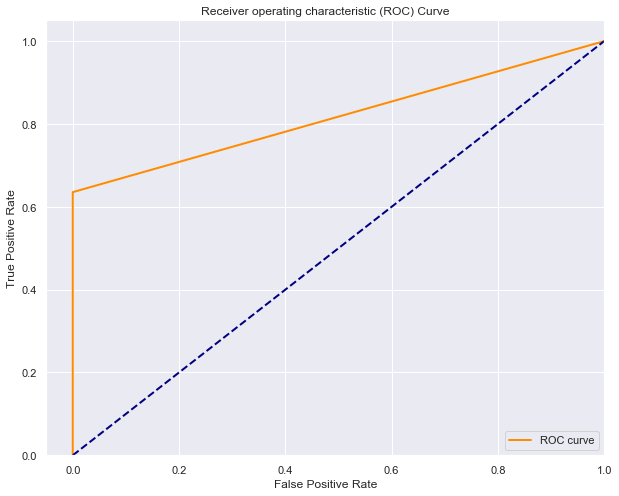

In [55]:
y_score = rfc.fit(X_train, y_train)
fpr2, tpr2, thresholds = roc_curve(y_test, rfc_pred)

sns.set_style('darkgrid')

print('AUC: {}'.format(auc(fpr2, tpr2)))
plt.figure(figsize=(10, 8))
lw = 2
plt.plot(fpr2, tpr2, color='darkorange',
         lw=lw, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlim([-.05, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

## Decision Tree Classifier

In [56]:
dt = DecisionTreeClassifier(random_state=42, max_depth = 3)  
model_dt = dt.fit(X_train, y_train)
dt_pred = model_dt.predict(X_test)
dt_pred_train = model_dt.predict(X_train)

In [57]:
model_dt.score(X_test,y_test)

0.9579081632653061

              precision    recall  f1-score   support

           0       0.95      1.00      0.98       688
           1       1.00      0.66      0.79        96

    accuracy                           0.96       784
   macro avg       0.98      0.83      0.88       784
weighted avg       0.96      0.96      0.95       784



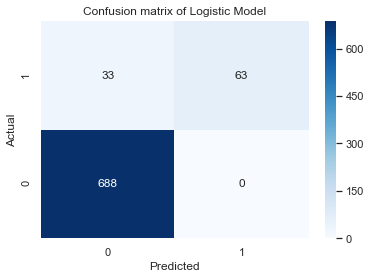

In [58]:
print(classification_report(y_test,dt_pred))
dt_matrix = confusion_matrix(y_test, dt_pred)
f,ax=plt.subplots()
sns.heatmap(dt_matrix, annot=True, fmt='d', cmap='Blues',ax=ax)
ax.set_ylim([0,2])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title("Confusion matrix of Logistic Model")
plt.show()

AUC: 0.828125


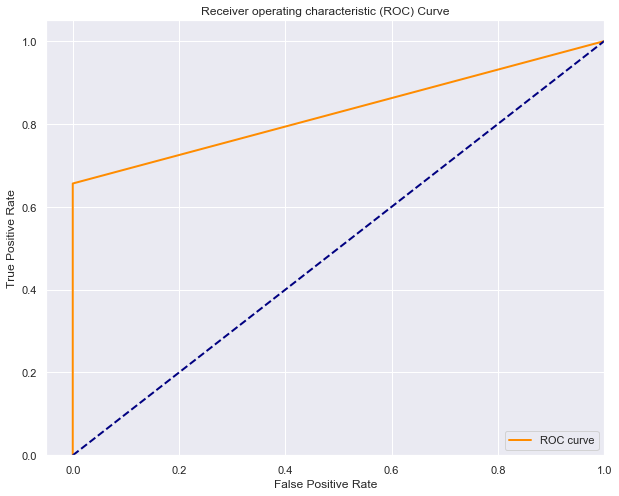

In [59]:
y_score = dt.fit(X_train, y_train)
fpr3, tpr3, thresholds = roc_curve(y_test, dt_pred)

sns.set_style('darkgrid')

print('AUC: {}'.format(auc(fpr3, tpr3)))
plt.figure(figsize=(10, 8))
lw = 2
plt.plot(fpr3, tpr3, color='darkorange',
         lw=lw, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.ylim([0.0, 1.05])
plt.xlim([-.05, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

## Adaboost

In [60]:
adaboost = AdaBoostClassifier(random_state=42)
model_ada = adaboost.fit(X_train, y_train)
ada_pred = model_ada.predict(X_test)

In [61]:
model_ada.score(X_test,y_test)

0.9247448979591837

              precision    recall  f1-score   support

           0       0.94      0.98      0.96       688
           1       0.78      0.54      0.64        96

    accuracy                           0.92       784
   macro avg       0.86      0.76      0.80       784
weighted avg       0.92      0.92      0.92       784



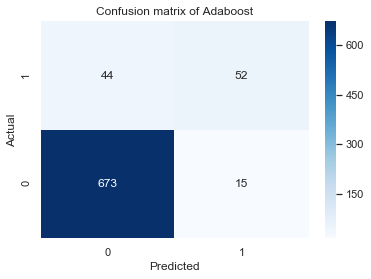

In [62]:
print(classification_report(y_test,ada_pred))
ada_matrix = confusion_matrix(y_test, ada_pred)
f,ax=plt.subplots()
sns.heatmap(ada_matrix, annot=True, fmt='d', cmap='Blues',ax=ax)
ax.set_ylim([0,2])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title("Confusion matrix of Adaboost")
plt.show()

AUC: 0.7599321705426355


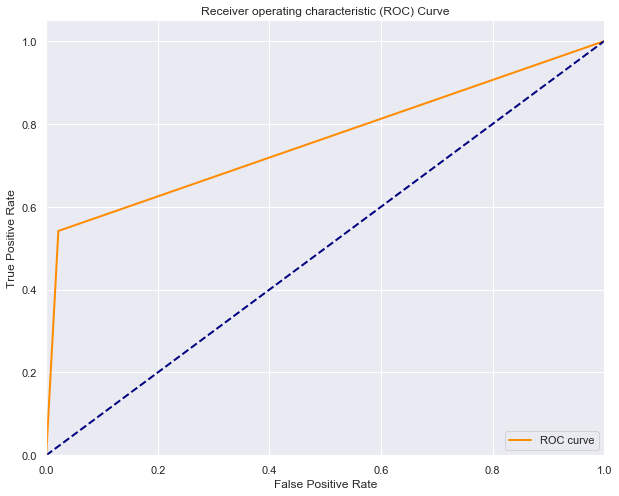

In [63]:
y_score = adaboost.fit(X_train, y_train)
fpr4, tpr4, thresholds = roc_curve(y_test, ada_pred)

sns.set_style('darkgrid')

print('AUC: {}'.format(auc(fpr4, tpr4)))
plt.figure(figsize=(10, 8))
lw = 2
plt.plot(fpr4, tpr4, color='darkorange',
         lw=lw, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

## Interpret

### Let's compare our models

In [64]:
print('Logistic Regression Score : ', logscore)
print('Random Forest Score : ', model_rfc.score(X_test, y_test))
print('Decision Trees Score : ', model_dt.score(X_test,y_test))
print('Adaboost Score : ', model_ada.score(X_test,y_test))

Logistic Regression Score :  0.8788265306122449
Random Forest Score :  0.9668367346938775
Decision Trees Score :  0.9579081632653061
Adaboost Score :  0.9247448979591837


As we can see, our better algorithm is Random Forest with a 96% accuracy.
Decision Trees algorithm is 95% accurate, not so far than Random Forest.

In [65]:
print('Logistic Regression AUC: {}'.format(auc(fpr, tpr)))
print('Random Forest AUC: {}'.format(auc(fpr2, tpr2)))
print('Decision Trees AUC: {}'.format(auc(fpr3, tpr3)))
print('Adaboost AUC: {}'.format(auc(fpr4, tpr4)))


Logistic Regression AUC: 0.8143168604651163
Random Forest AUC: 0.8177083333333333
Decision Trees AUC: 0.828125
Adaboost AUC: 0.7599321705426355


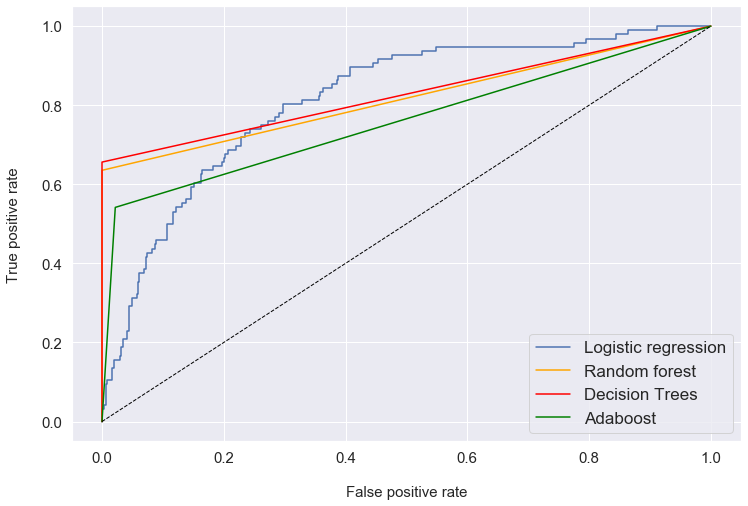

In [66]:
plt.figure(figsize = (12,8))
logistic_regression_roc = plt.plot(fpr, tpr, label='Logistic regression')
random_forest_roc = plt.plot(fpr2, tpr2, label='Random forest', c='orange')
decision_tree_roc = plt.plot(fpr3, tpr3, label='Decision Trees', c= 'red')
adaboost_roc = plt.plot(fpr4, tpr4, label='Adaboost', c= 'green')
plt.plot([0,1],[0,1],c='black', ls='--',linewidth =1)
plt.legend(loc=4,fontsize=17)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('False positive rate', fontsize=15,labelpad=20)
plt.ylabel('True positive rate', fontsize=15, labelpad=20)
plt.show()

### Let's compare confusion matrix's models

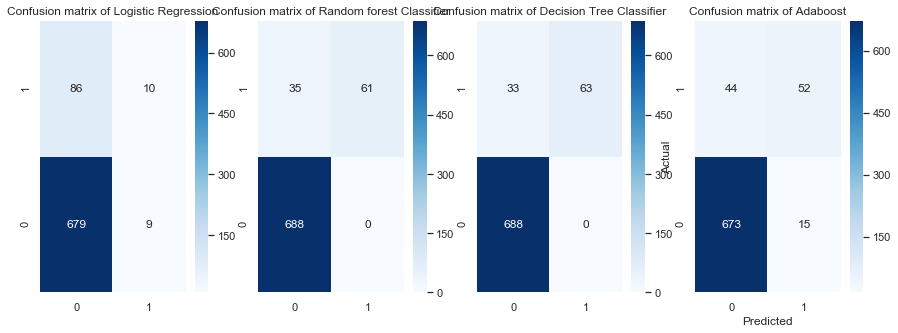

In [67]:
cf_matrix_lr = confusion_matrix(y_test, log_pred_test)
cf_matrix_rfc = confusion_matrix(y_test, rfc_pred)
cf_matrix_dt = confusion_matrix(y_test, dt_pred)
cf_matrix_ada = confusion_matrix(y_test, ada_pred)
f,ax=plt.subplots(1,4,figsize=(15,5))
sns.heatmap(cf_matrix_lr, annot=True, fmt='d', cmap='Blues',ax=ax[0])
ax[0].set_ylim([0,2])
ax[0].set_title("Confusion matrix of Logistic Regression")
sns.heatmap(cf_matrix_rfc, annot=True, fmt='d', cmap='Blues',ax=ax[1])
ax[1].set_ylim([0,2])
ax[1].set_title("Confusion matrix of Random forest Classifier")
sns.heatmap(cf_matrix_dt, annot=True, fmt='d', cmap='Blues',ax=ax[2])
ax[2].set_ylim([0,2])
ax[2].set_title("Confusion matrix of Decision Tree Classifier")
sns.heatmap(cf_matrix_ada, annot=True, fmt='d', cmap='Blues',ax=ax[3])
ax[3].set_ylim([0,2])
ax[3].set_title("Confusion matrix of Adaboost")
plt.ylabel('Actual')
plt.xlabel('Predicted')

plt.show()

For this problem and business is better to have more FP. In a worst case scenario we would be giving more attention on more customers. Following that line we can say that our Logistic regression can detect a higher number of false possitives.

Decision tree classifier and Rando Forest algorithms gave the higher number of true possitives.

We have some questions that could give us some more insights:

•	Do we need to offer international service calls plans?
•	Are your customers paying more than they should?
•	Our competitors have better plans?
•	Are you able to solve customer problems quickly?
•	Is our customer service enough good?
•	Do you have issues with International plans?


### Recommendations:

•	We need a better system to track customer service calls, their problems should be fixed as soon as possible.
•	We need to look at our competitors international plans, maybe they are offering better deals. Should we sell international plans knowing that people are using communication apps to make long distance calls?
•	We can offer different prices depending on the necessities of customers

### Future work

We got some insights, but it would be a great idea to get some more information about:

1.	Surveys with information about why the customer churned.
2.	We need to improve our logistic regression algorithm in order to improve accuracy.
3.	Churn rate of our competitors.


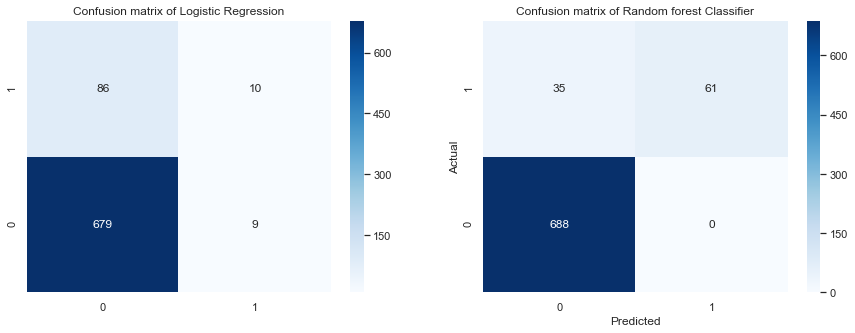

In [68]:
cf_matrix_lr = confusion_matrix(y_test, log_pred_test)
cf_matrix_rfc = confusion_matrix(y_test, rfc_pred)
cf_matrix_dt = confusion_matrix(y_test, dt_pred)
f,ax=plt.subplots(1,2,figsize=(15,5))
sns.heatmap(cf_matrix_lr, annot=True, fmt='d', cmap='Blues',ax=ax[0])
ax[0].set_ylim([0,2])
ax[0].set_title("Confusion matrix of Logistic Regression")
sns.heatmap(cf_matrix_rfc, annot=True, fmt='d', cmap='Blues',ax=ax[1])
ax[1].set_ylim([0,2])
ax[1].set_title("Confusion matrix of Random forest Classifier")
plt.ylabel('Actual')
plt.xlabel('Predicted')

plt.show()